## **Dataset Selection and Import**

#Get the publicly available dataset here:  https://www.kaggle.com/datasets/mrsimple07/remote-work-productivity



This dataset was obtained from Kaggle and contains synthetic data
which refers to artifically generated data created using algorithms, models, or simulations to resemble the real-world data on productivity, working hours and well-being indicators for both remote and in-office workers. It is designed to analyze the effect of different work environments on various metrics related to productivity and well-being.


#**Introduction**


In this analysis, we aim to explore the impact of remote work on employee productivity and well-being. The dataset provides key information on the hours worked, productivity scores, and well-being scores of employees working remotely or in office. We will clean the data, analyze the relationships between working hours, productivity and well-being and then provide insights that could be useful for organizational decision-making.

#**Problem Statement**


The  primary objective of this analysis is to understand the following:
1. Are there significant differences in **productivity** and **well-being** between remote and in-office employees?
2. How do **hours worked per week** affect **employee productivity?**
Does working more hours lead to higher productivity or is there diminishing return after certain number of hours?
3. How does the **well-being score** of employees correlate with their productivity and hours worked?


[link text](https://)
## Import Pandas and NumPy library

---





In [2]:
#import the library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

### **Reading in and Writing Data in Text Format: <font color='red'>*.csv* format</font>**



# csv -> comma separated value

In [3]:
# upload and read the dataset
from google.colab import files
files.upload()

Saving remote_work_productivity.csv to remote_work_productivity.csv


{'remote_work_productivity.csv': b'Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score\n1,Remote,29,75,78\n2,In-Office,45,49,47\n3,Remote,34,74,89\n4,Remote,25,81,84\n5,Remote,50,70,74\n6,In-Office,48,66,58\n7,Remote,38,44,76\n8,Remote,35,72,90\n9,Remote,30,70,89\n10,In-Office,40,59,57\n11,Remote,40,77,57\n12,Remote,31,67,69\n13,Remote,37,80,52\n14,Remote,42,78,83\n15,In-Office,47,76,66\n16,Remote,44,81,69\n17,In-Office,58,73,68\n18,In-Office,37,52,64\n19,In-Office,45,58,62\n20,Remote,46,83,58\n21,In-Office,44,56,54\n22,Remote,32,69,57\n23,In-Office,44,59,16\n24,In-Office,57,75,54\n25,In-Office,45,53,85\n26,In-Office,56,66,75\n27,In-Office,46,51,53\n28,In-Office,45,60,56\n29,In-Office,44,64,60\n30,In-Office,38,57,40\n31,Remote,41,49,81\n32,Remote,44,71,43\n33,In-Office,42,64,44\n34,In-Office,41,80,69\n35,In-Office,39,49,55\n36,Remote,33,80,64\n37,In-Office,48,84,72\n38,Remote,34,72,66\n39,Remote,43,67,70\n40,Remote,35,68,56\n41,Remote,37,74,75\n42,Remo

In [4]:
#load the dataset
df = pd.read_csv('remote_work_productivity.csv')

In [5]:
#display df output
df

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74
...,...,...,...,...,...
995,996,Remote,33,88,82
996,997,Remote,33,88,73
997,998,In-Office,45,74,61
998,999,In-Office,57,50,52


In [6]:
#explore the dataset by viewing the first 5 rows of the dataset
df.head()

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74


#**1. Data Cleaning**

In [7]:
#check if there's missing values
df.isnull().sum()

,0
Employee_ID,0
Employment_Type,0
Hours_Worked_Per_Week,0
Productivity_Score,0
Well_Being_Score,0


In [8]:
missing_values_before = df.isnull().sum()
print("Missing values before dropping:")
print(missing_values_before)

Missing values before dropping:
Employee_ID              0
Employment_Type          0
Hours_Worked_Per_Week    0
Productivity_Score       0
Well_Being_Score         0
dtype: int64


There's no missing values in the dataset as checked in the above 2 lines of code.


In [9]:
#check for duplicate rows
duplicates=df.duplicated()
#to identify how many duplicates are present
print("Number of duplicated rows:"+ str(duplicates.sum))

Number of duplicated rows:<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool>


As per the above line, there's no duplicates detected.

In [10]:
#get detailed info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employee_ID            1000 non-null   int64 
 1   Employment_Type        1000 non-null   object
 2   Hours_Worked_Per_Week  1000 non-null   int64 
 3   Productivity_Score     1000 non-null   int64 
 4   Well_Being_Score       1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [11]:
#Data Conversion
#convert 'Employment_Type' object column  to category
df['Employment_Type'] = df['Employment_Type'].astype('category')

In [12]:
#check data type after conversion
print(df.dtypes)

Employee_ID                 int64
Employment_Type          category
Hours_Worked_Per_Week       int64
Productivity_Score          int64
Well_Being_Score            int64
dtype: object


In [13]:
#check first few rows after conversion
print(df.head())

   Employee_ID Employment_Type  Hours_Worked_Per_Week  Productivity_Score  \
0            1          Remote                     29                  75   
1            2       In-Office                     45                  49   
2            3          Remote                     34                  74   
3            4          Remote                     25                  81   
4            5          Remote                     50                  70   

   Well_Being_Score  
0                78  
1                47  
2                89  
3                84  
4                74  


Therefore, the data type above matches our expectations based on the below:
1. Employee_ID is an integer which is as expected as it's unique for each employee.
2. Employment_Type which refers to a string type object which represents categorical data.
3. Hours_Worked_Per_Week is an integer as it represents the number of hours worked which is a numeric value.
4. Productivity_Score is an integer as well as it represents a score indicating productivity.
5. Well_Being_Score is an integer which shows that well being of an individual can be quantified using a numerical score.  

It's essential to check on the data types early on when exploring a dataset. In this case, the dataset is ready for analysis and as the data type appear to be appropriate for the respective columns. This means the dataset is ready for analysis without the need for any type of conversion or adjustments on data type.

On the other hand, based on the duplicate check above, there are no duplicate rows in the dataset. This shows that we can confidently proceed with further analysis and modeling, knowing that each data point represents a distinct employee's information. In many cases, duplicates arise when data is concatenated or merged which could result in biasness or distortion in analysis. Hence, it's crucial to ensure that it's checked early in the data cleaning process.

Checking for missing values and duplicates early in the dataset is key for ensuring clean data. This process of data inspection and preparation sets the foundation for analyzing relationships and drawing insights from the dataset before diving deeper into the analysis.

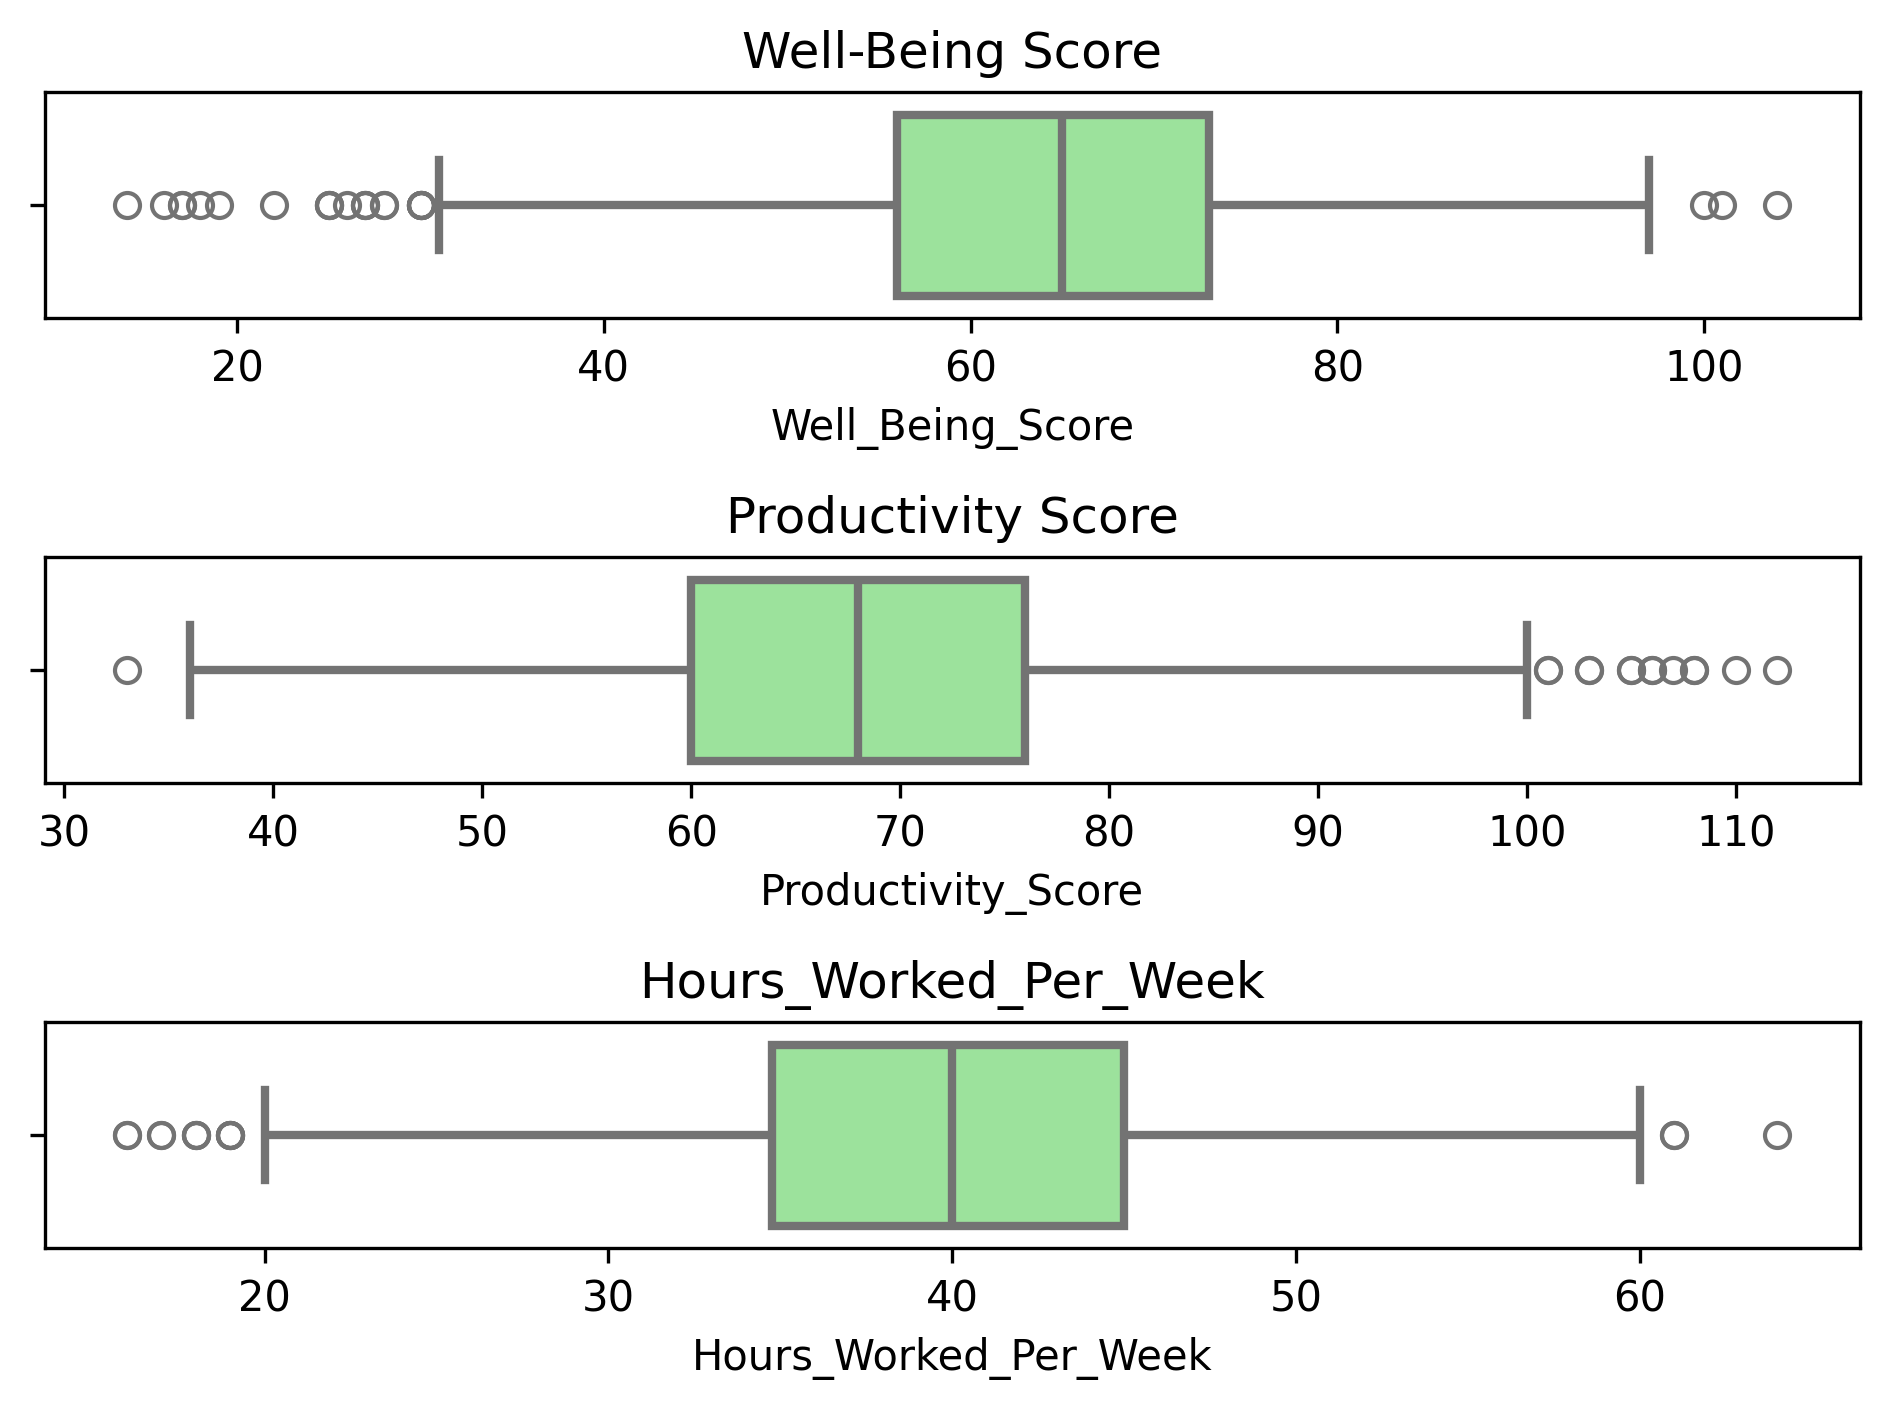

In [14]:
#detect outliers for
#Hours_Worked_Per_Week, Productivity_Score and Well_Being_Score

#create figure with high resolution (300 DPI)
fig = plt.figure(dpi=300)

#create subplot with 1 row and 2 columns
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3= fig.add_subplot(3, 1, 3)

#define color palette for boxplot
box_col='lightgreen'

#draw boxplot with customized colors
sns.boxplot(x=df['Well_Being_Score'],ax=ax1,color=box_col,
            fliersize=8,linewidth=2,whis=1.5,
            flierprops=dict(marker='o',markersize=6))
sns.boxplot(x=df['Productivity_Score'],ax=ax2,color=box_col,
            fliersize=8,linewidth=2,whis=1.5,
            flierprops=dict(marker='o',markersize=6))
sns.boxplot(x=df['Hours_Worked_Per_Week'],ax=ax3,color=box_col,
            fliersize=8,linewidth=2,whis=1.5,
            flierprops=dict(marker='o',markersize=6))

#add title for boxplot
ax1.set_title('Well-Being Score')
ax2.set_title('Productivity Score')
ax3.set_title('Hours_Worked_Per_Week')

#adjust layout to prevent overlap of elements
plt.tight_layout()

For the Productivity Score, it's visible that there are some outliers present in the data. However, I believe productivity scores greater than 100 is valid as it represents some employees with exceptional productivity reflecting on bonus greater than 100%. This is to ensure valuable information from the dataset is not removed because the outliers represent top performers and their data may provide critical insights about relationship between hours worked and productivity.

For Well-Being score, I  believe the outliers are reasonable as there will be employees with extreme burnout or dissatisfaction with work causing them to have low well being. These outliers represent individuals who are struggling and can provide valuable insights into factors affecting their well-being and productivity. On the other hand, employees who are very satisfied and passionate about their job representing highly motivated employees can provide insights on top performers with high job satisfaction and positive work-life balance . Therefore, I suggest to retain the score as it is to analyse the dynamics of well-being of both extremes which would be crucial to derive the overall workplace culture.

For the Hours worked per week category, there are some outliers present like some greater than 60 hours and some less than 20 hours. Minimum outlier of the data is 16 and maximum is 64. I would suggest to leave the outliers less than 20 as the employee may work only for a part-time basis resulting in reduced working hours. On the other hand, for outliers greater than 60, I would suggest to cap to 60 to maintain consistency across data. I prefer to maintain all the data, as the outlier isn't significant. However, to limit the influence of extreme values, my suggestion is to cap the hours to 60 to ensure extreme values do not overly influence average calculations.

In [15]:
#cap the working hours to 60
df['Hours_Worked_Per_Week']=df['Hours_Worked_Per_Week'].clip(upper=60)

In [16]:
#check summary statistics of Hours_Worked_Per_Week after capping
df['Hours_Worked_Per_Week'].describe()

,Hours_Worked_Per_Week
count,1000.000000
mean,39.714000
std,8.026495
min,16.000000
25%,34.750000
50%,40.000000
75%,45.000000
max,60.000000


The output obtained after running the code above confirms that there's no value greater than 60 hours worked in a week for employees.

#**Exploratory Data Analysis**


##Boxplot

Since outliers are handled, re-plot the **Boxplot** to see how the distribution of Hours_Worked_Per_Week looks after capping.

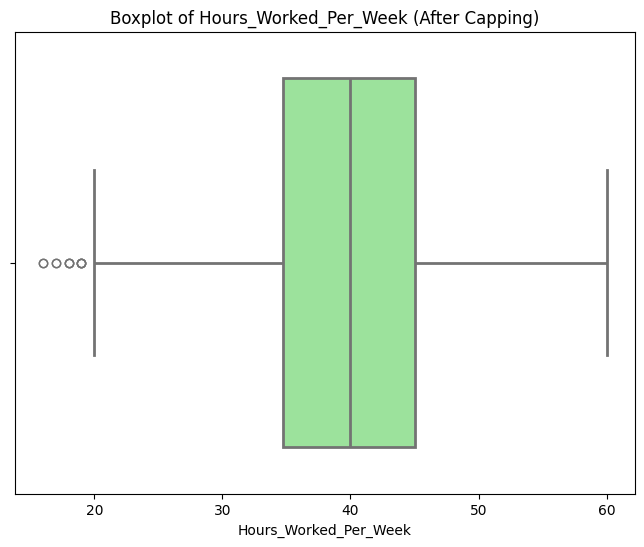

In [17]:
#create boxplot to visualize Hours_Worked_Per_Week after handling of outliers

#create figure with high resolution (300 DPI)
plt.figure(figsize=(8,6))

#draw boxplot with customized colors
sns.boxplot(data=df,x='Hours_Worked_Per_Week',color=box_col,
            fliersize=8,linewidth=2,whis=1.5,
            flierprops=dict(marker='o',markersize=6))

#define color palette for boxplot
box_col='teal'

#set title for plot
plt.title('Boxplot of Hours_Worked_Per_Week (After Capping)')
plt.show()

Next, let's  look at the count of remote vs in-office employees. This can be visualized using a **Bar Plot** since Employment Type variable is categorical. The x-axis represents the employement type and the y-axis represents the count of employees.

##Bar Plot

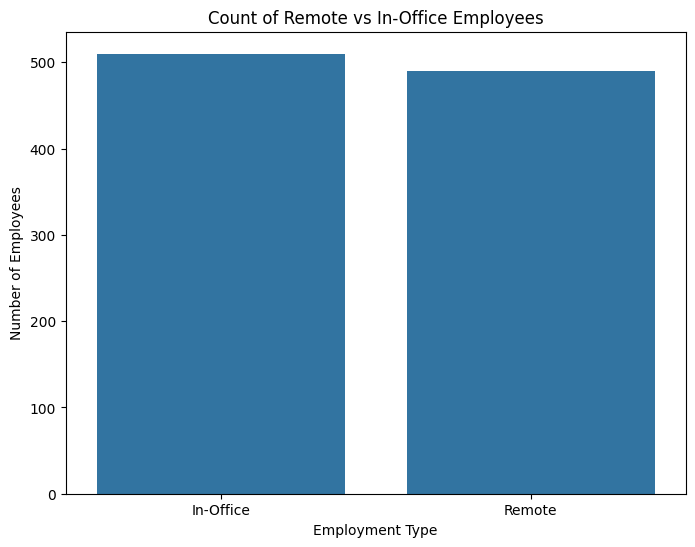

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Employment_Type')

#set the title of the plot
plt.title('Count of Remote vs In-Office Employees')

#set labels for x-axis and y-axis
plt.xlabel('Employment Type')
plt.ylabel('Number of Employees')

#display the plot
plt.show()

The bar plot indicates that there are slightly more in-office employees than remote workers. This may be due to the organization represented in the dataset having more positions that require in-office presence or remote work adoption is less common across all job functions. Alternatively, it might also indicate that remote-work option is on ly available for certain roles or departments. The relatively higher count of in-office workers may suggest a more traditional work environment where remote work is not widely accepted across all job functions.

##Scatter Plot

Next, let's look at **Scatter Plot** for 'Hours Worked Per Week' against 'Productivity Score'. This helps to examine the relationship between employees working hours and their productivity.

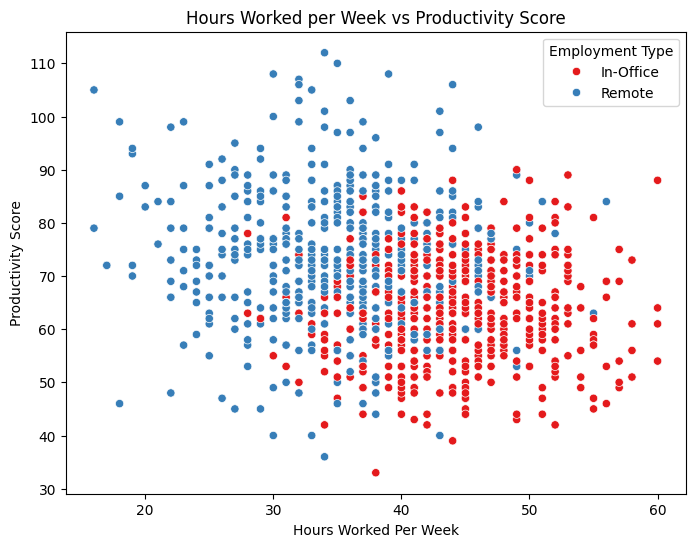

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Hours_Worked_Per_Week',y='Productivity_Score',
                hue='Employment_Type', palette='Set1')

#set the title of the plot
plt.title('Hours Worked per Week vs Productivity Score')

#set labels for x-axis and y-axis
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Productivity Score')

#set title for the categories' label
plt.legend(title='Employment Type')

#display the plot
plt.show()

##Scatter Plot with Regression Line

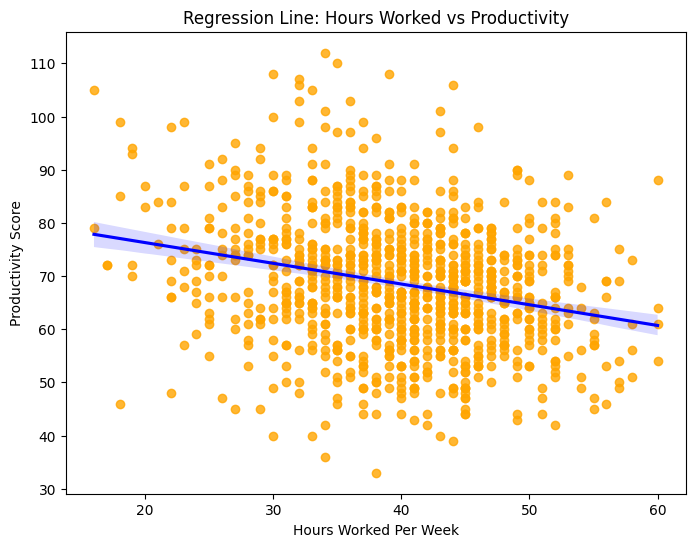

In [20]:
#scatterplot with regression line
plt.figure(figsize=(8,6))
sns.regplot(data=df,x='Hours_Worked_Per_Week',y='Productivity_Score',
                scatter_kws={'color':'orange'},line_kws={'color':'blue'})

#set the title of the plot
plt.title('Regression Line: Hours Worked vs Productivity')

#set labels for x-axis and y-axis
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Productivity Score')

#display the plot
plt.show()


Scatter plot visualizes the relationship between hours worked per week and productivity scores. It appears that as hours worked increase beyond a certain point (around 40 hours), productivity tends to decrease. This shows that beyond a certain number of hours worked, additional hours do not lead to proportional productivity gains. The scatter plot with regression line shows that there's an evident negative correlation between the two variables, as shown by the downward slope of the regression. This suggests that as the number of hours worked per week increase, productivity decreases.This may indicate that fatigue, burnout or decrease in focus as the working hours increase by a certain threshold, particulary 40 hours. Long hours contribute to decrease in efficiency. Employees working less than 40 hours tend to have higher productivity scores which suggests more moderate working hours that can be seen in remote workers lead to better productivity outcomes.

In addition, while regression line shows negative relationship, it is also crucial to note that remote workers generally work fewer hours compared to in-office employees, yet their productivity scores are relatively high. This could be because remote work provides greater flexibility, reducing stress and improving focus which in turn boosts productivity. In contrast, in-office employees working long hours may experience lower productivity as a result of the longer work hours and potential workplace distractions. Therefore, the regression line confirms that there is a significant diminishing return on productivity after 40 hours worked per week, further emphasizing the importance of work-life balance.

<Figure size 800x600 with 0 Axes>

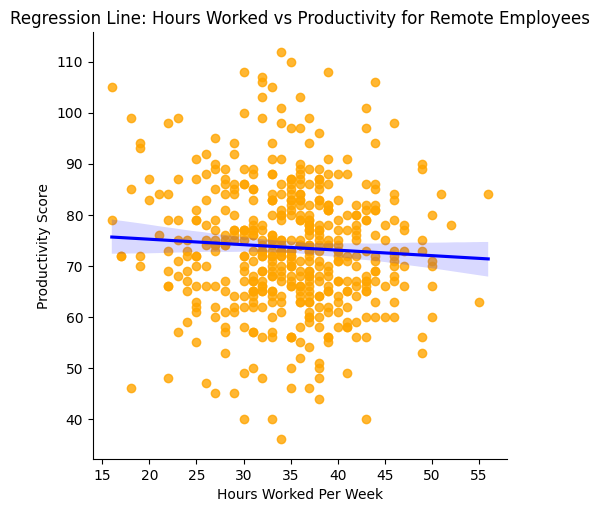

<Figure size 800x600 with 0 Axes>

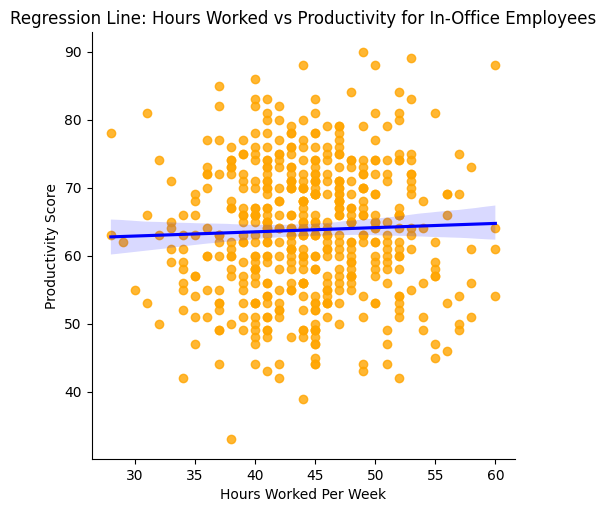

In [21]:
#scatterplot with regression line for remote workers
plt.figure(figsize=(8,6))
sns.lmplot(data=df[df["Employment_Type"]=="Remote"],x='Hours_Worked_Per_Week',y='Productivity_Score',
                scatter_kws={'color':'orange'},line_kws={'color':'blue'})

#set the title of the plot
plt.title('Regression Line: Hours Worked vs Productivity for Remote Employees')

#set labels for x-axis and y-axis
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Productivity Score')

#display the plot
plt.show()


#scatterplot with regression line for in-office employees
plt.figure(figsize=(8,6))
sns.lmplot(data=df[df["Employment_Type"]=="In-Office"],x='Hours_Worked_Per_Week',y='Productivity_Score',
                scatter_kws={'color':'orange'},line_kws={'color':'blue'})

#set the title of the plot
plt.title('Regression Line: Hours Worked vs Productivity for In-Office Employees')

#set labels for x-axis and y-axis
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Productivity Score')

#display the plot
plt.show()


While in-office employees generally work between 40 to 50 hours per week, and remote employees between 25 to 45 hours, regression analysis offers deeper understanding of producitvity dynamics. Negative slope of regression line for remote workers indicates that as hours worked increase, productivity decreases. This suggests that beyond a certain threshold, longer work hours lead to diminishing returns in productivity. Conversely, the slighlty positive slope for in-office employees implies that increased working hours are associated with a slight rise in productvity.

However, in overall, the productivity score is higher for remote employees compared to in-office employees. For instance, employees working 55 hours per week exhibit higher productivity level when working remotely compared to in-office employees. This observation suggests that remote work offers an environment that better supports sustained high-intensity work, potentially due to fewer in-office distractions and more personalized workspace.

For in-office employees, positive slope of regression line indicates that while additional hours enhance productivity, the effect is relatively modest. This could be due to factors like office-related distractions, commute fatigue, and challenges of maintaining focus in a shared workspace.

A Bureau of Labour Statistics replort indicates a positive relationship between remote work and total factor productivity, suggesting increased remote work is assciated with productivity growth across various industries. (https://www.bls.gov/productivity/notices/2024/productivity-and-remote-work.htm)

Regression analysis shows that while in-office employees may work longer hours, remote employees achieve higher productivity levels. This finding aligns with existing research suggesting remote work environments enhance productivity when employees are empowered to manage their work schedules and environments.

##Histogram

Then, let's look at the distribution of  Productivity Score and Well-Being Score of employees using a **Histogram** plot.


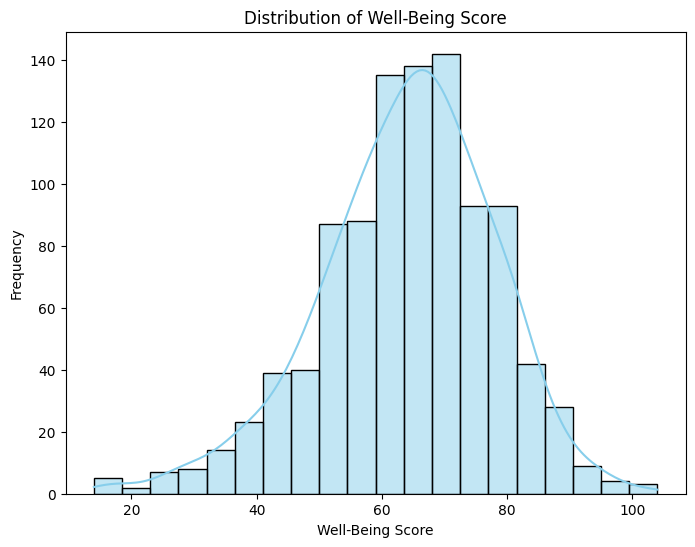

In [22]:
#histogram of well-being score
plt.figure(figsize=(8,6))
sns.histplot(df['Well_Being_Score'],bins=20,kde=True,color='skyblue')

#set the title of the plot
plt.title('Distribution of Well-Being Score')

#set labels for x-axis and y-axis
plt.xlabel('Well-Being Score')
plt.ylabel('Frequency')

#display the plot
plt.show()

The tail of the histogram can be seen to be longer on the left suggesting the data is negatively skewed.This means most of the employees are scoring towards the higher end of the well-being scale but a few of them have very low well-being scores. There are a few of them with extremely low well-being scores. For instance, there may be isolated cases of employees experiencing burnout or dissatisfcation with their work environment which pulls the distribution towards the lower end of the scale. On the other hand, many of the employees have a good well-being score indicating most of the employees feeling generally positive about their work-life balance. Some of the possible reasons for the data to have left skewness could be external factors like personal life issues, workplace policies or environments as well as burnout or dissatisfaction. For instance, research indicates that high workloads and low levels of support could lead to poorer health outcomes, contributing to lower well-being scores. (https://en.wikipedia.org/wiki/Occupational_stress). In addition, inequitable benefits design and lack of perceived relevance in workplace programs can negatively impact employee well-being. (https://journals.lww.com/joem/abstract/2024/02000/why_don_t_employees_participate_in_well_being.10.aspx)

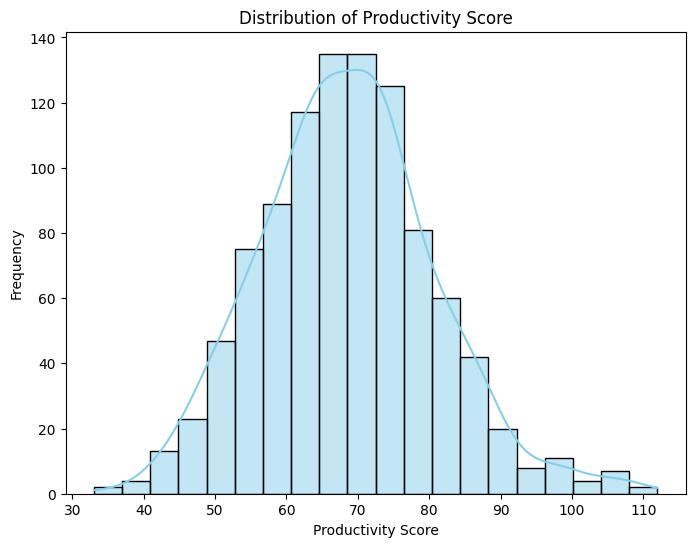

In [23]:
#histogram of productivity score
plt.figure(figsize=(8,6))
sns.histplot(df['Productivity_Score'],bins=20,kde=True,color='skyblue')

#set the title of the plot
plt.title('Distribution of Productivity Score')

#set labels for x-axis and y-axis
plt.xlabel('Productivity Score')
plt.ylabel('Frequency')

#display the plot
plt.show()

Since a histrogram can show the distribution of a numerical variable and the Productivity score variable is continuous (but discrete as an integer), we plot the above for analysis. The Kernel Density Estimate(KDE) line gives us an idea on the distribution shape and helps us to see the shape of the data. The plot above shows us the Productivity Scores are distributed across the employees.  For the above analysis, we can derive that the Productivity Score is normally distributed across the employees.

##Pair Plot

Then, let's look at the **Pair Plot** to analyse the relationship between variables like Well-Being, Productivity, and Hours Worked to visualize correlations and distribution.

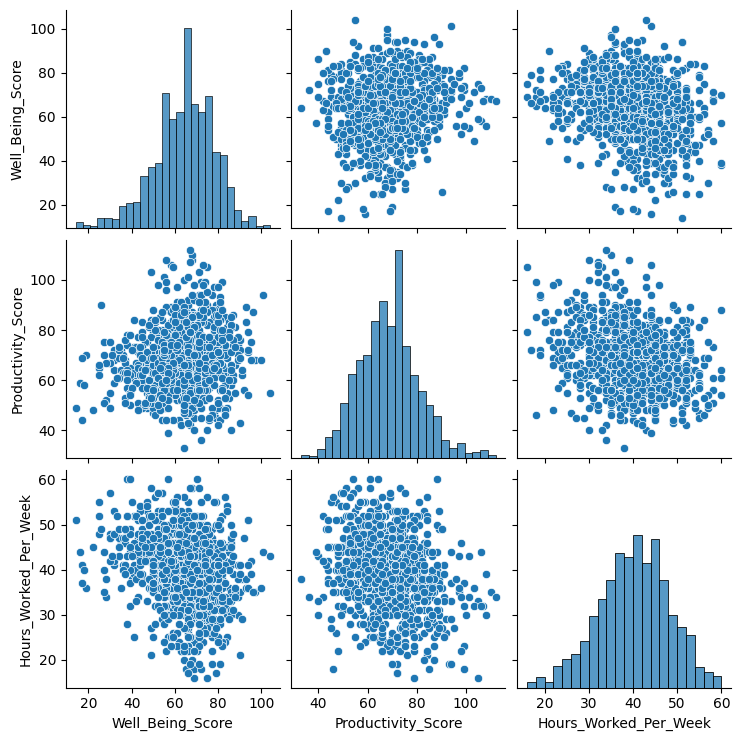

In [24]:
sns.pairplot(df[['Well_Being_Score','Productivity_Score','Hours_Worked_Per_Week']])
plt.show()

In [30]:
correlation=df["Hours_Worked_Per_Week"].corr(df["Productivity_Score"])
r_squared=correlation**2
print(f"R-squared: {r_squared}")

R-squared: 0.06534663366856172


In [31]:
correlation_matrix=df[["Well_Being_Score","Productivity_Score"]].corr()
pearson_corr=correlation_matrix.loc["Well_Being_Score","Productivity_Score"]
r_squared=pearson_corr**2

print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"R-squared: {r_squared}")

Pearson Correlation Coefficient: 0.1351631821994385
R-squared: 0.018269085822278604


The Pair Plot allows you to quickly assess how the variables interact with each other and see if there are any visible trends or clusters. We can see that, as the hours worked per week increase, the Productivity and Well-Being of employees decrease. This suggests a negative relationship between the number of hours and employee work and their overall performance and well-being. While long hours, may initially boost productivity, they often lead to diminishing returns in the long run. This is proven by a 2024 article from Hughes Recruiting which discusses the law of diminishing returns, noting that after a certain point, additional effort yiels smaller results. This concept is relevant in the context of overwork, where prolonged hours can lead to decreased productivity and increased health issues. (https://hughesrecruiting.com/2024/08/14/debunking-the-long-hours-myth-5-reasons-why-they-dont-mean-more-productivity). For both organizational success and employee health, it is important to maintain a balance that allows employees to be productive while ensuring their well-being is supported. Employees should work smarter and not longer.

However, the Productivity Score and Well-Being Score are positively related to each other. When an employee works for extreme long hours, they When the well-being score of an employee increases, the productivity of that employee increases and vice versa. This simply means better well being leads to higher producitvity. For instance, when an employee is highly motivated and engaged, the productivity of that employee increases because they feel more energized. Motivated employees are more likely to perform better and consistently product quality work (https://peoplethriver.com/employee-motivation-and-its-impact-on-productivity). On the other hand, better well-being leads to higher productivity. Employee well-being is crucial for workplace productivity. When employees' well-being is thriving, they take fewer sick days, deliver high performance work, and have lower rates of burnout and turnover. (https://www.gallup.com/workplace/215924/well-being.aspx). When an employee performs well at work, they receive rewards or promotion which leads to greater satisfaction and personal sense of fulfillment.

## Box Plot

Let's also look into visualizing distributions of both Productivity and Well-Being for the remote and in-office employees by plotting a **BoxPlot**.

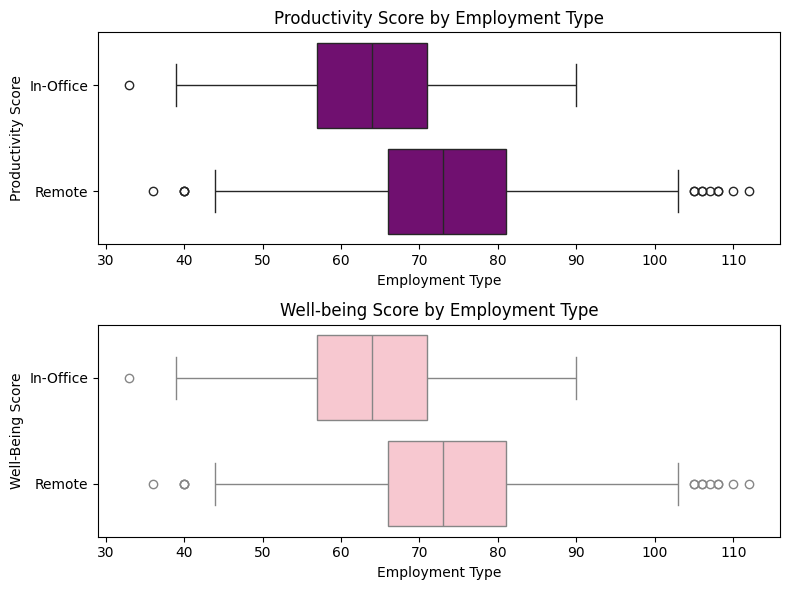

In [ ]:
#set up the figure size
plt.figure(figsize=(8,6))

#Boxplot for Productivity by Employment Type
plt.subplot(2,1,1)
sns.boxplot(data=df,y='Employment_Type',x='Productivity_Score',color='purple')
plt.title('Productivity Score by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Productivity Score')

#Boxplot for Well-Being by Employment Type
plt.subplot(2,1,2)
sns.boxplot(data=df,y='Employment_Type',x='Productivity_Score',color='pink')
plt.title('Well-being Score by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Well-Being Score')

plt.tight_layout()
plt.show()

Both the Productivity Score and Well-being Score boxplot illustrates that the median for remote employees is higher than the median for in-office employees. This shows that the remote workers, on average, have a higher productivity score and are more satisfied with their well-being. Remote employees are generally more productive and feel better in terms of well-being.

It is also evident that some of the remote employees have had exceptionally high productivity score as well as well-being score.

#**Conclusion**

The analysis revealed that remote workers tend to have higher productivity scores and higher well-being compared to in-office employees. This could be due to the flexibility and autonomy that remote work provides. A study published in "Fronters in Psychology" found that remote work offers increased flexibility and autonomy, which can lead to improved health and work-life balance for employees. (https://pmc.ncbi.nlm.nih.gov/articles/PMC9819704) Workplace policies should take into account the positive relationship between well-being and productivity. Promoting employee well-being whether remote or in-office can lead to better performance and long-term satisfaction. Remote work appears to have generally positive impact on both productivity and well-being as seen in the higher medians and better overall scores for remote employees. Research from the Journal of Business and Psychology indicates that remote work can enhance job satisfaction and performance, particularly when employees have greater autonomy and flexibility.(https://pmc.ncbi.nlm.nih.gov/articles/PMC9566387/) Besides, capping the number of working hours at 60 helps to mitigate the impact of extreme values and maintain consistency across the dataset. The finding that more hours worked does not necessarily lead to better productivity (and in some cases reduces it) reinforces the importance of work hours with employee well-being. A study in Occupational Medicine concluded that overwork has a negative impact on labor productivity, emphasizing the importance of managing working hours to maintain performance (https://pmc.ncbi.nlm.nih.gov/articles/PMC11292309/). In conclusion, given the strong relationship between well-being and productivity, organizations should consider focusing on creating a healthy work-life balance to enhance both employee well-being and productivity to ensure that employees are supported and empowered to do their best work.
